In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We have to divide the Geyser data into k=2 two-dim normal distribution
faithful=pd.read_csv(r'C:\Users\User\Desktop\NCCU\Simulation\faithful.csv')

In [8]:
faithful.head(10)

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
5,6,2.883,55
6,7,4.700,88
7,8,3.600,85
8,9,1.950,51
9,10,4.350,85


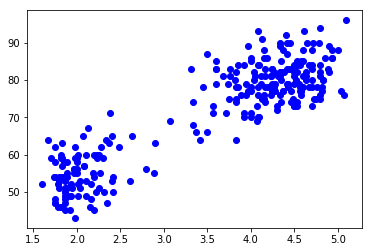

In [6]:
plt.plot(faithful['eruptions'],faithful['waiting'],'bo')

In [9]:
x=[]
for i in range(len(faithful)):x.append((faithful['eruptions'][i],faithful['waiting'][i]))
x=np.array(x)

#use the lists z1、z2 to compute initial value
#from the plot we guess we can divide the data into two group of 
# normal distribution by ['eruptions']=3
z1=[]
z2=[]
for i in range(len(x)):
    if x[i][0]<=3:z1.append(x[i])
    else : z2.append(x[i])

z1=np.array(z1)
z2=np.array(z2)

#define a variable of initial parameter from estimation (a1,a2,mu1,cov1,mu2,cov2)
sita=[len(z1)/(len(z1)+len(z2)),len(z2)/(len(z1)+len(z2)),
      np.array([np.mean(z1[:,0]),np.mean(z1[:,1])]),np.cov(z1[:,0],z1[:,1]),
      np.array([np.mean(z2[:,0]),np.mean(z2[:,1])]),np.cov(z2[:,0],z2[:,1])]

In [10]:
sita

[0.35661764705882354,
 0.6433823529411765,
 array([ 2.03813402, 54.49484536]),
 array([[ 0.07121718,  0.45226632],
        [ 0.45226632, 34.10674399]]),
 array([ 4.29130286, 79.98857143]),
 array([[ 0.16879903,  0.9180667 ],
        [ 0.9180667 , 35.93090312]])]

In [17]:
#define a function of 2-dim normal distribution 
def BN(X,MU,COV):
    y=np.exp(-((((X-MU).T).dot(np.linalg.inv(COV))).dot(X-MU))/2)/(2*np.pi*(np.sqrt(np.linalg.det(COV))))
    return y

#defind a function to compute label probability p(yj|xi,Sita)
def PY(X,Sita):
    y=[]
    for i in range(len(X)):
        y.append([(Sita[0]*BN(X[i],Sita[2],Sita[3]))/(Sita[0]*BN(X[i],Sita[2],Sita[3])+Sita[1]*BN(X[i],Sita[4],Sita[5])),
                  Sita[1]*BN(X[i],Sita[4],Sita[5])/(Sita[0]*BN(X[i],Sita[2],Sita[3])+Sita[1]*BN(X[i],Sita[4],Sita[5])) ])
    y=np.array(y)
    return y
#define a likelihood function of mixture 2-dim normal distribution 
def Q(X,Sita):
    y=0
    for i in range(len(X)):
        y+=np.log(Sita[0]*BN(X[i],Sita[2],Sita[3]))*PY(X,Sita)[i,0]+np.log(Sita[1]*BN(X[i],Sita[4],Sita[5]))*PY(X,Sita)[i,1]
    return y


#define a function of EM algorithm(data,initial parameter)
def EM(X,Sita):
    i=0
    sita0=[0.5,0.5,np.array([1,30]),np.array([[0.07,0.5],[0.5,34.0]]),np.array([3.0,50.0]),np.array([[0.17,0.9],[0.9,35.0]])]
    sita1=Sita.copy()
    while Q(X,sita1)>Q(X,sita0):
        sita0=sita1.copy()
        sita1[0:2]=[np.mean(PY(X,sita0)[:,0]),np.mean(PY(X,sita0)[:,1])]
        sita1[2]=(X.T).dot(PY(X,sita0)[:,0])/(np.sum(PY(X,sita0)[:,0]))
        cov1=np.array([[0.0,0.0],[0.0,0.0]])
        for j in range(len(X)):cov1+=(np.outer((X[j]-sita0[2]),X[j]-sita0[2]))*(PY(X,sita0)[j,0])
        sita1[3]=cov1/(np.sum(PY(X,sita0)[:,0]))
        sita1[4]=(X.T).dot(PY(X,sita0)[:,1])/(np.sum(PY(X,sita0)[:,1]))
        cov2=np.array([[0.0,0.0],[0.0,0.0]])
        for k in range(len(X)):cov2+=(np.outer((X[k]-sita0[4]),X[k]-sita0[4]))*(PY(X,sita0)[k,1])
        sita1[5]=cov2/(np.sum(PY(X,sita0)[:,1]))
        i+=1
    print('(a1,a2,mu1,cov1,mu2,cov2)=',sita0,'iteration=',i)

In [4]:
EM(x,sita)

(a1,a2,mu1,cov1,mu2,cov2)= [0.3560462082867129, 0.6439537917132871, array([ 2.03681388, 54.48286414]), array([[ 0.06951069,  0.43881671],
       [ 0.43881671, 33.72337668]]), array([ 4.29003333, 79.97257302]), array([[ 0.16950149,  0.93470502],
       [ 0.93470502, 35.98036659]])] iteration= 1


In [5]:
#from the other initial paramater to estimate sita
sita_2=[0.5,0.5,np.array([1,40]),np.array([[0.07,0.5],[0.5,34.0]]),np.array([3.0,60.0]),np.array([[0.17,0.9],[0.9,35.0]])]
EM(x,sita_2)

(a1,a2,mu1,cov1,mu2,cov2)= [0.35587285710570676, 0.6441271428942933, array([ 2.03638845, 54.47851638]), array([[ 0.06916767,  0.43516762],
       [ 0.43516762, 33.69728207]]), array([ 4.28966197, 79.96811517]), array([[ 0.16996844,  0.94060932],
       [ 0.94060932, 36.04621132]])] iteration= 31


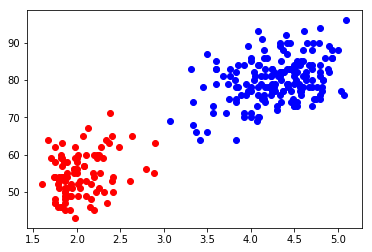

In [15]:
# use the estimate to cluster the data to two different distribution
sita_estimate=[0.35587285710570676, 0.6441271428942933, np.array([ 2.03638845, 54.47851638]), np.array([[ 0.06916767,  0.43516762],
       [ 0.43516762, 33.69728207]]), np.array([ 4.28966197, 79.96811517]), np.array([[ 0.16996844,  0.94060932],
       [ 0.94060932, 36.04621132]])]
x1=[]
x2=[]
Py=PY(x,sita_estimate)
for i in range(len(x)): 
    if Py[i,0]>Py[i,1]:x1.append(x[i])
    else :x2.append(x[i])
x1=np.array(x1)
x2=np.array(x2)
plt.plot(x1[:,0],x1[:,1],'ro')
plt.plot(x2[:,0],x2[:,1],'bo')